# Populations in Medieval Europe

Content here

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy.signal

Sources:
https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1
https://jingwen-z.github.io/draw-animated-graphs-with-matplotlib/

## Data Import & Cleaning

In [2]:
df = pd.read_excel("/Users/Hendrik/Documents/Coding/Data Science/Reddit/Medieval Populations in Europe/eu_medieval_pop_growth.xlsx",sheet_name="Data")

In [3]:
df = df.set_index("Year")

In [4]:
df = df.iloc[:,0:7]
df = df.apply(scipy.signal.savgol_filter, args=(25,5),axis = 0)
df.head()

,Germany,France,GBR,Italy,Spain and Portugal,Belgium,Netherlands
Year,,,,,,,
1000,5.40,9.0,1.90,7.000,9.00,0.600,0.500
1010,5.50,9.2,1.92,7.050,8.90,0.610,0.510
1020,5.60,9.4,1.94,7.100,8.80,0.620,0.520
1030,5.70,9.6,1.96,7.150,8.70,0.630,0.530
1040,5.80,9.8,1.98,7.200,8.60,0.640,0.540
...,...,...,...,...,...,...,...
1960,72.08,52.6,47.48,47.512,39.96,8.830,11.556
1970,74.71,54.7,50.31,49.864,42.62,9.185,12.632
1980,77.34,56.8,53.14,52.216,45.28,9.540,13.708


In [5]:
%matplotlib notebook

<IPython.core.display.Javascript object>


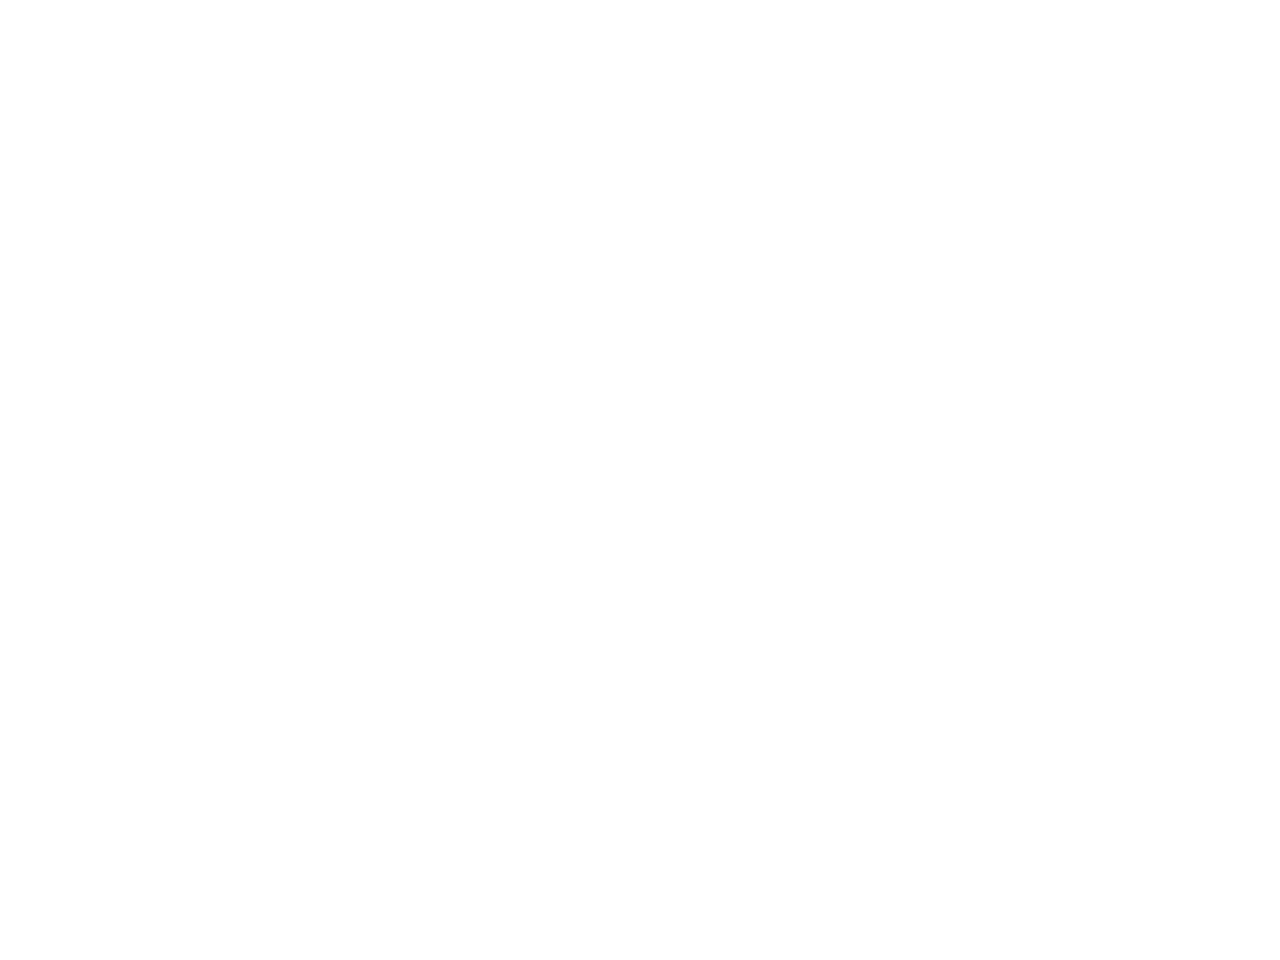

In [44]:
df3
sns.lineplot(x=df3.index,y=df3.loc[:,'Italy'])
plt.show()

In [46]:
plt.clf()

In [30]:
sns.lineplot(x=df.index,y=yhat)
plt.show()

In [6]:
def smoothListGaussian(listin,strippedXs=False,degree=5):  
    window=degree*2-1  
    weight=np.array([1.0]*window)  
    weightGauss=[]  
    for i in range(window):  
        i=i-degree+1  
        frac=i/float(window)  
        gauss=1/(np.exp((4*(frac))**2))  
        weightGauss.append(gauss)
    weight=np.array(weightGauss)*weight  
    smoothed=[0.0]*(len(listin)-window)  
    for i in range(len(smoothed)):        smoothed[i]=sum(np.array(listin[i:i+window])*weight)/sum(weight)  
    return smoothed

,Germany,France,GBR,Italy,Spain and Portugal,Belgium,Netherlands
Year,,,,,,,
1000,5.40,9.0,1.90,7.000,9.00,0.600,0.500
1010,5.50,9.2,1.92,7.050,8.90,0.610,0.510
1020,5.60,9.4,1.94,7.100,8.80,0.620,0.520
1030,5.70,9.6,1.96,7.150,8.70,0.630,0.530
1040,5.80,9.8,1.98,7.200,8.60,0.640,0.540
...,...,...,...,...,...,...,...
1960,72.08,52.6,47.48,47.512,39.96,8.830,11.556
1970,74.71,54.7,50.31,49.864,42.62,9.185,12.632
1980,77.34,56.8,53.14,52.216,45.28,9.540,13.708


In [8]:
df2 = df.apply(smoothListGaussian,degree=5,axis=0)

In [9]:
df2

,Germany,France,GBR,Italy,Spain and Portugal,Belgium,Netherlands
0,5.800000,9.800000,1.980000,7.200000,8.600000,0.640000,0.540000
1,5.900000,10.000000,2.000000,7.250000,8.500000,0.650000,0.550000
2,6.000000,10.200000,2.020000,7.300000,8.400000,0.660000,0.560000
3,6.099893,10.400000,2.040320,7.350000,8.300000,0.670107,0.570000
4,6.199361,10.600000,2.061917,7.400000,8.200000,0.680639,0.580000
...,...,...,...,...,...,...,...
117,58.906862,42.278164,33.519733,35.942196,27.032524,7.074667,6.353238
118,61.553610,44.249206,36.212402,38.156529,29.422886,7.415432,7.300951
119,64.188932,46.308221,38.998754,40.464776,31.997189,7.765907,8.336178
120,66.820000,48.400000,41.820000,42.808000,34.640000,8.120000,9.404000


<IPython.core.display.Javascript object>


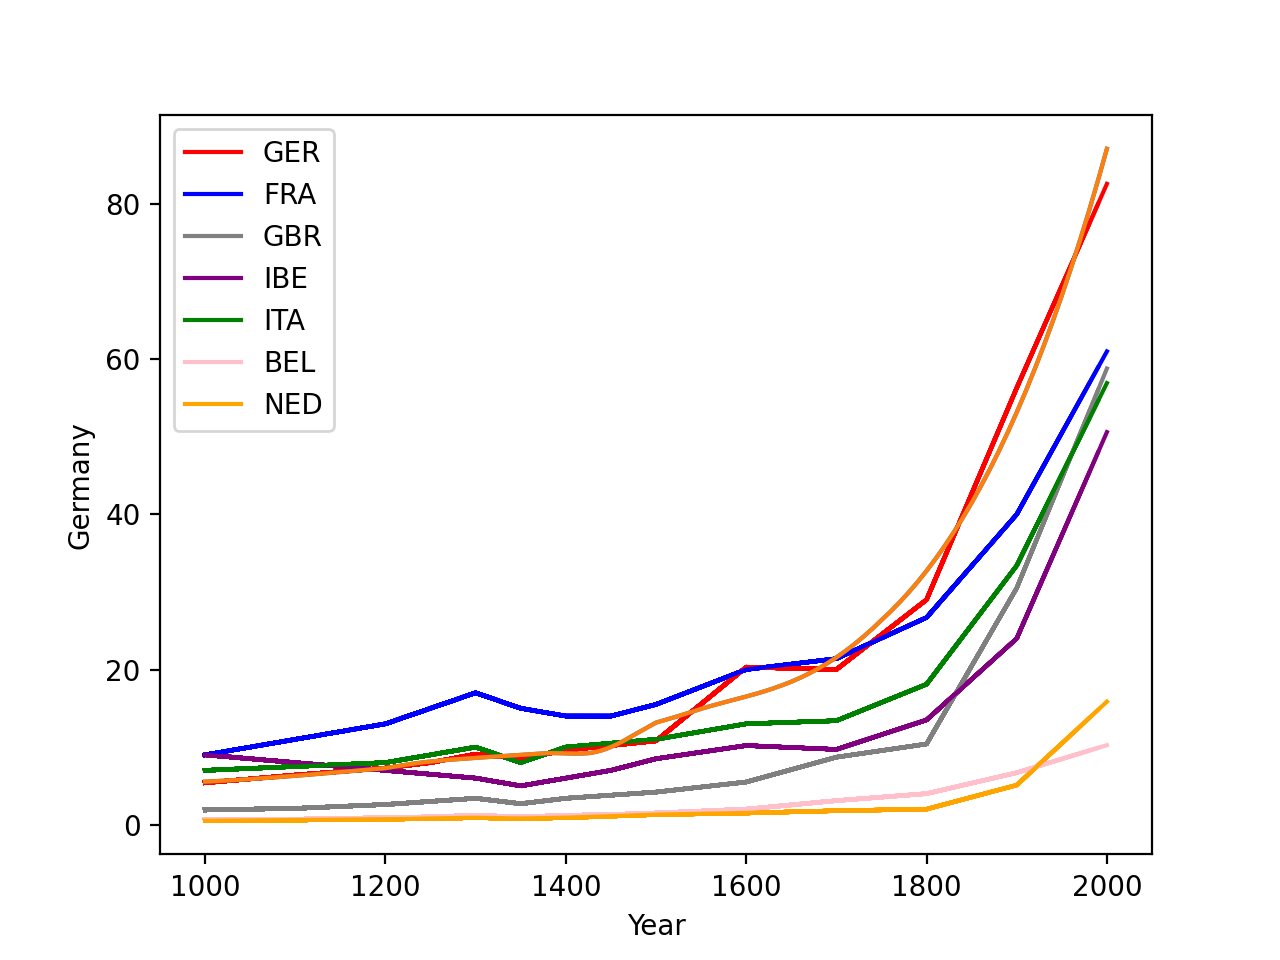

In [10]:
fig = plt.figure()
ax = plt.axes(xlim=(900, 2100), ylim=(0, 100))

In [11]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

In [12]:
def animate(i):
    data = df.iloc[:int(i+1)] # selecting the data range
    p_ger = sns.lineplot(x=data.index,y=data['Germany'],color="red")
    p_fra = sns.lineplot(x=data.index,y=data['France'],data=data,color="blue")
    p_eng = sns.lineplot(x=data.index,y=data['GBR'],color='gray')
    p_ibe = sns.lineplot(x=data.index,y=data['Spain and Portugal'],color='purple')
    p_ita = sns.lineplot(x=data.index,y=data['Italy'],color='green')
    p_bel = sns.lineplot(x=data.index,y=data['Belgium'],color='pink')
    p_ned = sns.lineplot(x=data.index,y=data['Netherlands'],color='orange')
    plt.legend(['GER', 'FRA', 'GBR', 'IBE', 'ITA', 'BEL', 'NED'])

In [13]:
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=131, repeat=True, interval=20)

In [47]:
Writer = animation.FFMpegFileWriter
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

In [ ]:
ani.save()

In [15]:
plt.show()

In [16]:
plt.clf()